# user2code2vec

Profiling users based on their code submissions

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {'weight': 'bold', 'size': 20}
plt.rc('font', **font)

In [262]:
MAX_LENGTH = 50

## Data

In [8]:
df_programs = pd.read_json('data/raw/programming_data.json')

In [9]:
df_programs.head(2)

,academic_year_0,academic_year_1,correct,date,extension,ip,module,task,upload,user
0,2016,2017,True,2016-09-19 14:11:41,py,,ca277,add.py,#!/usr/bin/env python\n\na = int(raw_input())\...,b9e7e608-6036-4d44-8770-a7036176b53c
1,2016,2017,True,2016-09-19 14:17:33,py,,ca277,concat-lines.py,#!/usr/bin/env python\n\na = str(raw_input())\...,b9e7e608-6036-4d44-8770-a7036176b53c


In [14]:
'{:,}'.format(len(df_programs))

'591,707'

In [10]:
df_grades = pd.read_json('data/raw/grades_data.json')

In [11]:
df_grades.head(2)

,academic_year_0,academic_year_1,exam_week,grade,module,user
0,2015,2016,12,40,ca114,e45f938b-9d5c-4838-86ce-0755e3c97053
1,2015,2016,12,60,ca114,91b06877-f0e0-4af9-bbd4-b20ffa90e36b


## Embeddings

**Word Embeddings**

In [51]:
import pickle

with open('word_tokenizer.pickle', 'rb') as handle:
    word_tokenizer = pickle.load(handle)

Using TensorFlow backend.


In [52]:
word_tokenizer

In [4]:
word_embeddings = np.load('data/processed/word_embeddings.npy')

In [102]:
word_embeddings[0]

array([  3.20499041e-03,   6.38828892e-03,  -2.61360989e-03,
         1.21804588e-02,  -4.79790894e-03,   4.87694144e-03,
         1.06907613e-03,   1.08982509e-04,   7.11855851e-03,
         2.63679982e-03,  -1.64534897e-03,   4.91980743e-03,
         1.86812982e-03,  -7.23894406e-03,   1.65409315e-03,
         1.62446667e-02,   8.84898566e-03,   3.65996035e-03,
        -7.62557657e-03,  -1.19400944e-03,   1.09521765e-02,
         2.97816866e-03,   1.37127461e-02,   2.29922123e-03,
         1.27818505e-03,  -1.24419052e-02,  -1.23855739e-03,
        -5.01443353e-03,   6.59154681e-03,  -4.18931668e-05,
        -7.49713555e-03,  -6.82181725e-03,  -1.02162752e-02,
        -1.46007305e-02,   1.93526689e-02,  -8.01626965e-03,
         1.94888387e-03,  -8.80953483e-03,  -1.75504535e-02,
         9.06417903e-04,   1.43993702e-02,  -1.45244598e-02,
         4.97889821e-04,   2.13164166e-02,   1.96220595e-02,
        -6.45289756e-03,   6.94654975e-03,   2.10526981e-03,
        -1.32069951e-02,

In [119]:
'{:,}'.format(len(word_embeddings))

'2,000'

In [109]:
# Dictionary of words
id_to_word = { v: k for k, v in word_tokenizer.word_index.items() }

In [128]:
[id_to_word[i] for i in range(1, 6)]   

[u'=', u'i', u'+', u'if', u'def']

In [120]:
'{:,}'.format(len(id_to_word))

'231,658'

In [121]:
# Top words
[word for word, occurrences in sorted(word_tokenizer.word_counts.items(), key=lambda t: t[1], reverse=True)[:5]]

[u'=', u'i', u'+', u'if', u'def']

**Token Embeddings**

In [100]:
with open('token_tokenizer.pickle', 'rb') as handle:
    token_tokenizer = pickle.load(handle)

In [101]:
token_tokenizer

In [22]:
token_embeddings = np.load('data/processed/token_embeddings.npy')

In [103]:
token_embeddings[0]

array([ 0.01460352, -0.03239648, -0.00952747, -0.04767586, -0.00056213,
       -0.01250812, -0.02986935,  0.02739234,  0.05777664, -0.01667299,
       -0.00367632, -0.0067643 , -0.00893395, -0.04015754,  0.05620264,
       -0.00233626,  0.00531714, -0.04759621,  0.00420295, -0.01822634,
        0.04951934, -0.00466349,  0.0016342 , -0.00396287, -0.02008804,
        0.03872301, -0.0294856 , -0.00216598, -0.01532773, -0.00716725,
       -0.01303595, -0.08101101,  0.01094339,  0.01036139,  0.01998942,
        0.05003039,  0.01344838,  0.03293208, -0.04692577,  0.03910193,
       -0.0702792 , -0.10156526, -0.00081641, -0.02767217,  0.10246237,
       -0.21030578, -0.01900478, -0.0472949 , -0.02968714,  0.0244431 ,
        0.04553653, -0.02478014, -0.00676316, -0.02407935,  0.0813391 ,
        0.01661319, -0.00200479, -0.09400276, -0.03220959, -0.00685081,
       -0.04375071,  0.02739184,  0.0074121 ,  0.04908051,  0.00070999,
        0.01987942, -0.01847783,  0.0186893 , -0.01300028,  0.00

In [134]:
len(token_embeddings[0])

100

In [118]:
'{:,}'.format(len(token_embeddings))

'2,000'

In [112]:
id_to_token = { v: k for k, v in token_tokenizer.word_index.items() }

In [114]:
id_to_token[1]

u')'

In [117]:
'{:,}'.format(len(id_to_token))

'37,912'

**AST Embeddings**

In [7]:
#TODO

## CA116 on 2016/2017

In [229]:
course = 'ca116'
academic_year = [2016, 2017]

In [232]:
def get_data(course, academic_year):

    programs = df_programs[(df_programs['module'] == course) &
                           (df_programs['academic_year_0'] == academic_year[0])]
    
    exercises = sorted(programs.task.unique())
    
    grades = df_grades[(df_grades['module'] == course) &
                       (df_grades['academic_year_0'] == academic_year[0])]
    
    students = grades.user.unique()
    
    return programs, exercises, grades, students

In [233]:
programs, exercises, grades, students = get_data(course, academic_year)

In [234]:
'{:,}'.format(len(programs)), len(exercises), '{:,}'.format(len(grades)), len(students)

('68,313', 276, '327', 126)

In [47]:
import re
def remove_comments(text):
    return re.sub(re.compile('#.*?\n'), '', text)

In [286]:
def get_vectors(tokenizer, embeddings, programs, exercises, grades, students, program='latest'):
    
    usr_vector = {}
    avg_grade = {}

    for student_name in students:
        
        # Grade
        average = grades[grades['user'] == student_name]['grade'].mean()    
        avg_grade[student_name] = average
        
        for task in exercises:
    
            # Code programs
            submissions = programs[(programs['user'] == student_name) & 
                                   (programs['task'] == task)].sort_values(by='date', ascending=False).index
            
            if len(submissions) > 0: 
            
                if program == 'latest':
                    latest_index = submissions[0]
                    submission = df_programs.iloc[latest_index, :]['upload']
                else: # random
                    random_index = random.choice(submissions)
                    submission = df_programs.iloc[random_index, :]['upload']

                submission = remove_comments(submission)

                # Sequences
                sequences = tokenizer.texts_to_sequences([submission])
                # Padded sequences
                padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post')

                sequence = padded_sequences[0]
                
            else:
                
                sequence = np.zeros(MAX_LENGTH)
            
            usr_vector.setdefault(student_name, [])
            usr_vector[student_name].append(sequence)

        # Sequences
        #sequence = tokenizer.texts_to_sequences(submissions)
        
        # Transform words / tokens using their embeddings
        #seq_embeddings = [np.average([embeddings[item] for item in seq], axis=0) for seq in sequences if len(seq) > 0]
        
        # Average vector
        #avg_emb_vector = np.average(seq_embeddings, axis=0)
        #usr_vector.append(avg_emb_vector)
    
    return usr_vector, avg_grade

**Words**

In [285]:
word_usr_vector, word_avg_grade = get_vectors(word_tokenizer, word_embeddings, programs, exercises, grades, students)

6237
9632
9633
9634
15560
9635
9637
16014
18119
10335
15715
15561
15562
10332
9963
9958
9962
9964
9965
16012
15718
15840
15054
15055
15841
15056
16029
15717
16027
16021
16022
16024
16026
16023
16025
16512
16013
16015
16016
16017
16018
16028
16019
16513
16514
17400
18118
18120
18117
18122
18123
17404
17406
17403
18116
16685
16683
16684
16688
16518
16519
16520
16521
17395
16682
16516
16687
16511
16515
17394
17396
17397
17398
17399
17401
510
6239
6240
6241
6242
6243
6244
6246
6247
7290
7291
7292
22344
7294
8641
8642
8643
8644
8645
8646
8648
9966
10336
14180
14181
14182
14183
14184
14185
15063
14187
14189
17407
16690
15058
15059
15060
15061
16030
16031
16032
16033
16035
16689
16692
17414
17415
17408
17409
17411
17412
17416
17410
21708
512
179394
6248
6249
179380
179382
179384
179386
179002
7300
7297
7299
7296
8649
8651
9968
14190
14191
14192
14194
179354
16694
179370
15064
15066
15067
15068
15065
16036
16037
16693
16696
179373
181833
181832
21762
7301
7303
7310
7309
7304
7305
7307
7308
730

16782
6435
6436
6437
6438
6439
6441
7424
7425
7427
7428
7423
10051
10052
10053
10054
14356
15179
16784
15180
15181
16785
16786
15183
15185
16781
17556
17557
17559
17560
17562
17558
219482
219496
219511
219517
219524
219532
230160
226317
226329
230188
226265
226271
226269
226315
226331
219520
230163
230190
230144
230147
230174
230184
6442
6443
6444
6445
6446
230172
230176
230181
7429
8836
8837
8838
8839
8841
315112
14359
297547
353601
353603
294208
297545
297549
305635
305691
305710
294216
294219
294223
294226
16788
297542
294206
294210
15186
361310
361314
361320
16787
17563
17564
361292
353607
353621
182092
182090
209931
209946
239650
239640
209941
209935
209955
239644
239652
219477
219540
219544
239559
239564
239635
239633
230149
230151
230153
305686
361289
361306
562
6453
6454
6455
6456
6457
6459
7432
7434
7431
8844
8845
8846
8847
8848
15845
14361
14362
14363
14364
14365
14366
14367
14369
16143
16144
17567
16791
17566
15188
15189
16145
16146
16790
16794
16793
17568
17569
17571
17573


7585
7588
7589
17734
17731
17732
17733
7586
17730
9023
9024
10137
9025
9026
9027
10142
10139
14540
14541
15286
15287
15288
14542
14544
16900
15281
15282
15283
15284
16275
16276
17737
17736
16278
16899
17738
17720
17727
17728
17729
17721
17722
17724
17735
17723
606
6622
6623
6624
6625
6626
6628
7608
7602
7603
7605
7607
7604
7601
9029
9030
9031
9032
9033
9034
9036
10145
10144
14545
14546
14547
14548
14549
14550
14551
14553
16904
16903
16906
17739
17740
17742
17743
17745
17741
608
10147
6629
6630
6631
6632
6633
7613
7610
7612
7609
9037
9038
9039
9040
17746
14554
14555
14556
14557
14559
15289
17747
15290
15291
16279
16280
17748
17749
17751
17753
17750
610
9044
9045
8242
9046
8243
10159
9053
9665
10158
10152
10153
10155
10157
10154
10156
10355
9042
9043
10353
9047
9048
9049
9052
10149
14562
16289
14563
14564
15302
15303
14567
14569
14566
16283
16285
15293
15604
14561
16550
14560
16908
16282
15294
15297
15298
15299
15295
16286
16287
16551
16290
16292
16907
16911
16910
17084
21827
17760
17761

182100
182881
14713
16970
17122
15384
15386
15387
15388
15385
21479
16388
16389
17101
180650
180649
21661
16969
16973
182774
182773
182779
17193
17194
182884
182781
17923
17924
17926
182870
17929
17925
21659
182856
21750
182872
182858
182866
182868
182879
182784
182785
656
6794
6796
6789
6790
6791
6792
6793
6795
6798
6799
7742
7741
7735
7736
7738
7740
7737
7734
9223
9224
9225
9226
9227
9228
9230
10247
10246
14733
14726
14727
14728
14729
14730
14732
14734
14731
15390
14723
14724
14722
15391
15393
15394
15395
15392
17930
17931
17933
17934
17936
17932
658
6800
6801
6802
6803
6804
7748
7744
7745
7747
7743
9231
9232
9233
9234
9235
10250
10249
14735
14736
14737
14738
14739
14741
17937
16975
15397
15398
15399
16392
16393
16394
16396
16974
17938
17939
17941
17943
17940
15657
15637
15638
15639
15640
15641
15644
15651
15686
15687
15692
15647
15648
15652
15654
15634
15684
15685
15688
15643
15664
15693
15635
15645
15675
15680
15649
15650
15653
15656
15661
15678
15681
15683
15666
15676
15677
15674


14702
14703
14705
17915
16382
16383
16384
16386
16387
660
15409
16977
15410
17124
6836
6833
6834
7787
7788
7789
7790
17125
15432
15433
366719
52535
224649
217177
217180
217183
217186
217190
217201
217208
233178
219792
224656
225994
217204
219772
224643
219777
219786
219783
219790
219800
217195
225982
225996
225975
225977
225986
225992
10436
6838
6839
6840
6841
6842
6844
6845
8308
225984
225988
233180
10382
7794
7795
7797
7799
7796
7792
7793
79248
21551
16989
9281
9282
9283
9285
10380
10270
10271
318117
318091
318094
318097
318105
318108
318114
318120
299368
318080
318083
291707
302175
292874
292876
302159
302169
310093
291714
291716
291719
291722
291702
299349
21306
291704
15694
17198
15697
15440
15436
291697
291699
15750
15751
15752
15753
366720
15756
15759
15760
15761
15816
15817
15818
21166
16432
16993
16435
17127
16987
16996
16992
16994
17197
17200
17307
17202
17203
17990
17991
17993
17994
17996
17992
291709
354405
21310
352257
364923
352253
345471
352241
345482
352246
345479
22684

In [288]:
len(word_usr_vector), len(word_avg_grade)

(126, 126)

In [290]:
word_usr_vector

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [210]:
from sklearn.decomposition import PCA

def get_pca(vectors):

    # PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(vectors)
    print 'PCA explained variance ratio:', pca.explained_variance_ratio_, 'Total:', sum(pca.explained_variance_ratio_)
    return principal_components

In [211]:
word_pca = get_pca(word_usr_vector)

PCA explained variance ratio: [ 0.96382562  0.00684176] Total: 0.970667385519


In [212]:
def get_color(grade):
    
    if grade < 20:
        return 'black'
    elif grade < 40:
        return 'red'
    elif grade < 60:
        return 'orange'
    elif grade < 80:
        return 'yellow'
    else:
        return 'green'

In [213]:
def plot_vectors(low_dim_vectors, grades, figsize=(8, 8)):

    plt.figure(figsize=figsize, dpi=100)
    ax = plt.axes()
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())
    
    i = 0
    while i < len(low_dim_vectors):
            
        x, y = low_dim_vectors[i, :]
        g = grades[i]
        color = get_color(g)
        plt.scatter(x, y, color=color)
        
        i += 1

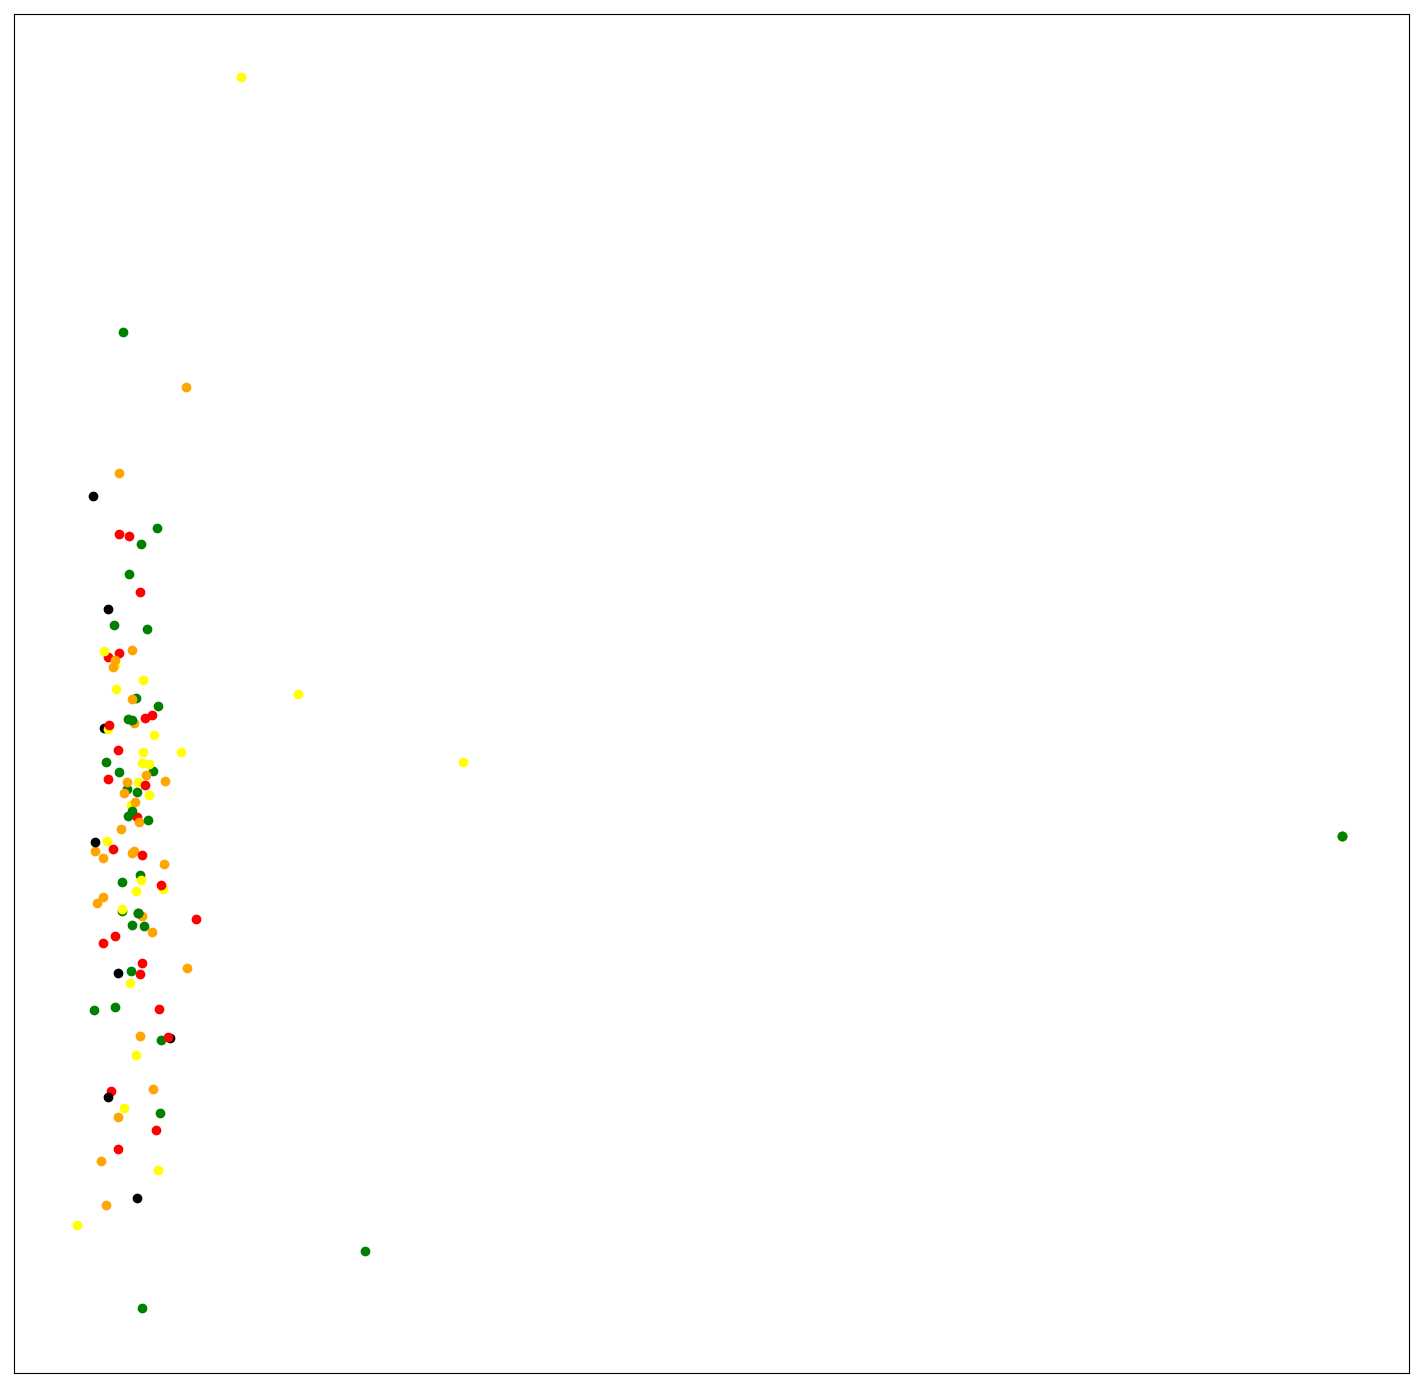

In [214]:
plot_vectors(word_pca, word_avg_grade, figsize=(18, 18))

**Tokens**

In [215]:
token_usr_vector, token_avg_grade = get_vectors(token_tokenizer, token_embeddings, programs, grades, students)

In [216]:
token_pca = get_pca(token_usr_vector)

PCA explained variance ratio: [ 0.91404993  0.04581475] Total: 0.959864688171


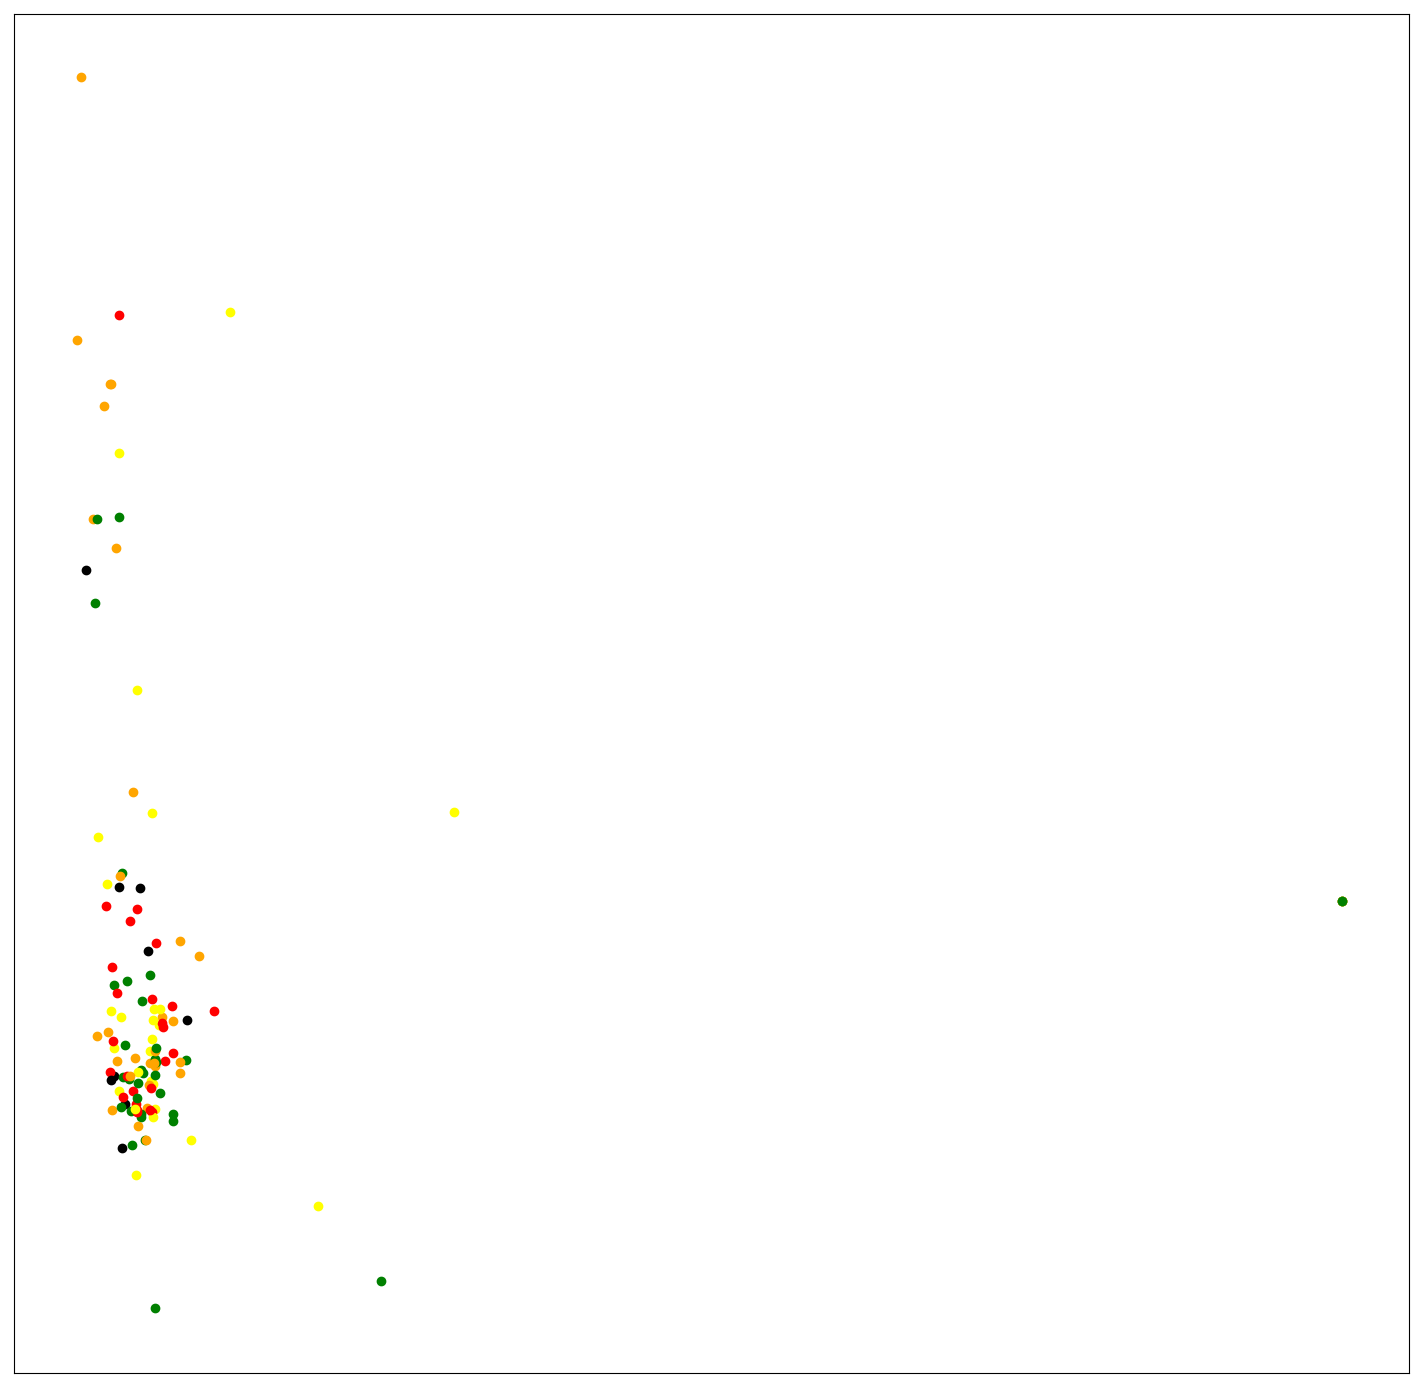

In [217]:
plot_vectors(token_pca, token_avg_grade, figsize=(18, 18))

## CA117 on 2016/2017

In [218]:
course = 'ca117'
academic_year = [2016, 2017]

In [221]:
programs, grades, students = get_data(course, academic_year)

In [222]:
'{:,}'.format(len(programs)), '{:,}'.format(len(grades)), len(students)

('74,065', '280', 140)

**Words**

In [226]:
word_usr_vector, word_avg_grade = get_vectors(word_tokenizer, word_embeddings, programs, grades, students)

In [227]:
word_pca = get_pca(word_usr_vector)

PCA explained variance ratio: [ 0.25940821  0.12728801] Total: 0.386696217775


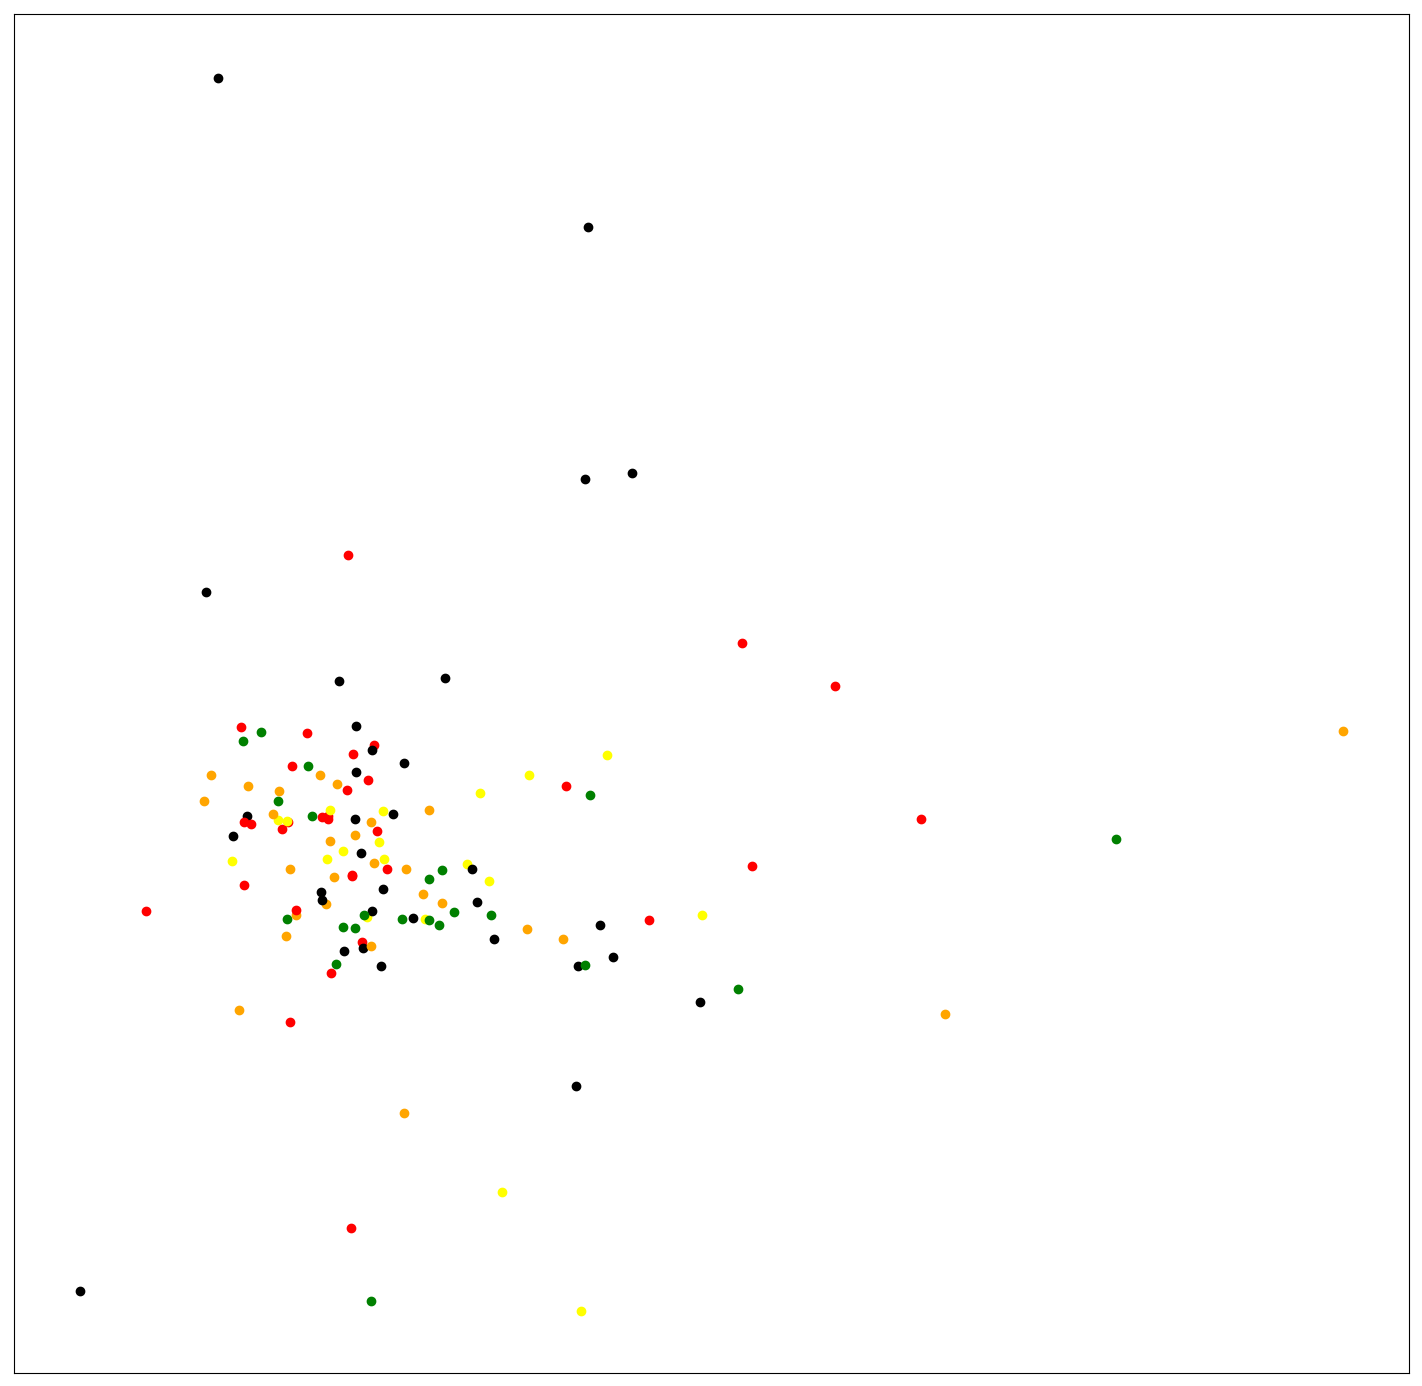

In [228]:
plot_vectors(word_pca, word_avg_grade, figsize=(18, 18))

**Tokens**

In [223]:
token_usr_vector, token_avg_grade = get_vectors(token_tokenizer, token_embeddings, programs, grades, students)

In [224]:
token_pca = get_pca(token_usr_vector)

PCA explained variance ratio: [ 0.36235507  0.13632322] Total: 0.498678282877


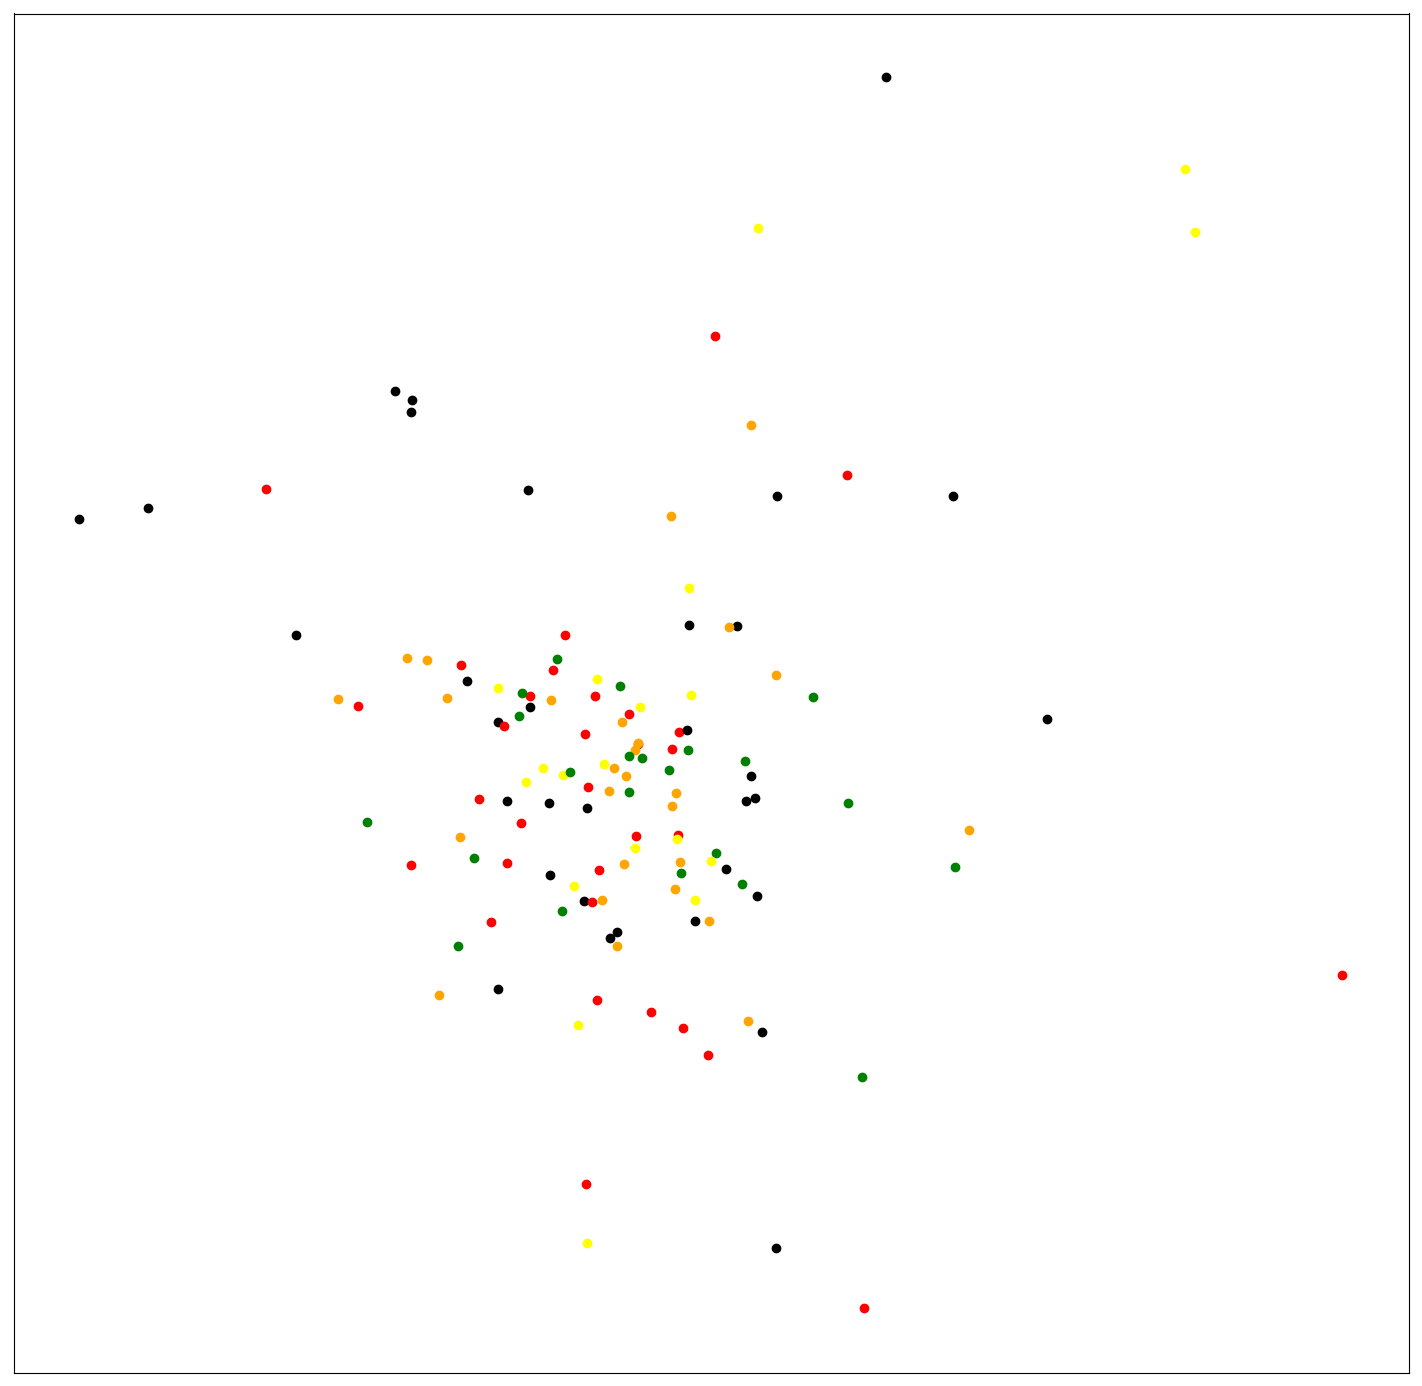

In [225]:
plot_vectors(token_pca, token_avg_grade, figsize=(18, 18))